In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import dates
from matplotlib.colors import LogNorm
from sunpy.time import parse_time
import datetime

In [2]:
all_data = pd.read_csv('all_ar_2010-2020.csv')
all_data.keys()

Index(['ar_noaanum', 'event_starttime', 'event_endtime', 'hpc_x', 'hpc_y',
       'hgs_x', 'hgs_y', 'hgc_x', 'hgc_y', 'frm_humanflag', 'frm_name',
       'frm_daterun', 'ar_mtwilsoncls', 'ar_mcintoshcls', 'SOL_standard',
       'ar_numspots', 'area_atdiskcenter', 'area_unit'],
      dtype='object')

In [3]:
tt = pd.to_datetime(all_data['event_starttime'])
times = [(t - tt[0]).total_seconds() for t in tt]
all_data['times'] = times

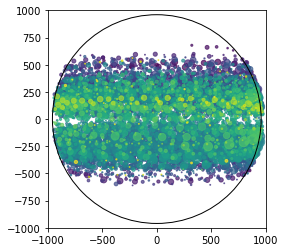

In [4]:
circle1 = plt.Circle((0, 0), 960, color='k', fill=False)
plt.scatter(all_data['hpc_x'], all_data['hpc_y'], s=10*all_data['area_atdiskcenter']/all_data['area_atdiskcenter'].mean(),
            c=times, alpha=0.7)
plt.xlim(-1000, 1000)
plt.ylim(-1000, 1000)
ax = plt.gca()
ax.add_artist(circle1)
plt.gca().set_aspect('equal', adjustable='box')

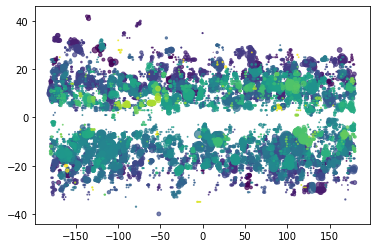

In [5]:
plt.scatter(all_data['hgc_x'], all_data['hgc_y'], 
            s=10*all_data['area_atdiskcenter']/all_data['area_atdiskcenter'].mean(), 
            c=times, 
            alpha=0.7)


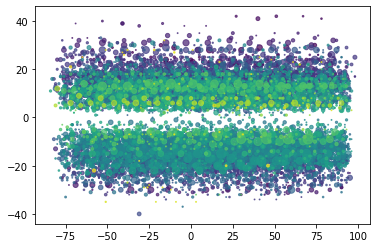

In [6]:
plt.scatter(all_data['hgs_x'], all_data['hgs_y'], 
            s=10*all_data['area_atdiskcenter']/all_data['area_atdiskcenter'].mean(), 
            c=times, alpha=0.7)


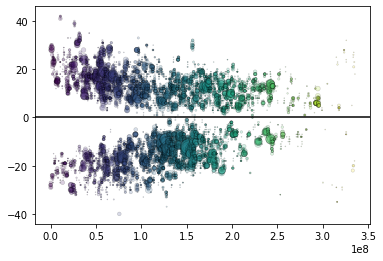

In [7]:
plt.scatter(times, all_data['hgc_y'], 
            alpha=0.2, c=times, 
            s=10*all_data['area_atdiskcenter']/all_data['area_atdiskcenter'].mean(),
            #s=100*all_data['ar_numspots']/all_data['ar_numspots'].mean(),
            cmap='viridis', edgecolor='k', lw=0.5)
plt.axhline(0, color='k')

Text(0.5, 0, 'No. sunspots')

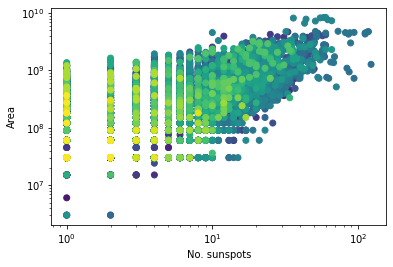

In [8]:
plt.scatter(all_data['ar_numspots'], all_data['area_atdiskcenter'], c=all_data['times'])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Area')
plt.xlabel('No. sunspots')

# Plot as function of time

In [9]:
tstart = parse_time(all_data['event_starttime'].min()).datetime
tfinal = parse_time(all_data['event_endtime'].max()).datetime
time_over = [tstart.strftime('%Y-%m-%dT%H:%M:%S')]
t0 = tstart
while t0 < tfinal:
    t0 = t0 + datetime.timedelta(days=1)
    time_over.append(t0.strftime('%Y-%m-%dT%H:%M:%S'))

In [10]:
def plot_for_date(i, savedir='/Users/lahayes/space_weather_stuff/SolarStatsStuff/ar_analysis/plots/'):
    """
    datey should be str in format "YYYY-mm-ddTHH:MM:SS"
    """
    if i < 10:
        data_for_past = all_data[all_data['event_starttime'].isin(time_over[0:i])]
    else:
        data_for_past = all_data[all_data['event_starttime'].isin(time_over[i-10:i])]
        
        
    data_for_day = all_data[all_data['event_starttime'].isin([time_over[i]])]
    
    fig, ax = plt.subplots(figsize=(5,5))
    circle1 = plt.Circle((0, 0), 960, color='k', fill=False)
    if len(data_for_day) > 0:
        ax.scatter(data_for_day['hpc_x'], data_for_day['hpc_y'], 
                   s=10*data_for_day['area_atdiskcenter']/all_data['area_atdiskcenter'].mean(), 
                   alpha=0.7, color='k', marker='x')
        
    if len(data_for_past)>0:
        ax.scatter(data_for_past['hpc_x'], data_for_past['hpc_y'], 
                   s=10*data_for_past['area_atdiskcenter']/all_data['area_atdiskcenter'].mean(), 
                   c=data_for_past['times'],
                   cmap='Reds',
                   alpha=0.7)        
    ax.set_xlim(-1000, 1000)
    ax.set_ylim(-1000, 1000)

    
    ax.set_xlabel('X arcsec')
    ax.set_ylabel('Y arscec')
    ax.set_title(time_over[i])
    ax.add_artist(circle1)
    ax.set_aspect('equal', adjustable='box')
    plt.tight_layout()
    plt.show()
#     plt.savefig(savedir + 'test_{:04d}.png'.format(i), dpi=200)
#     plt.close()


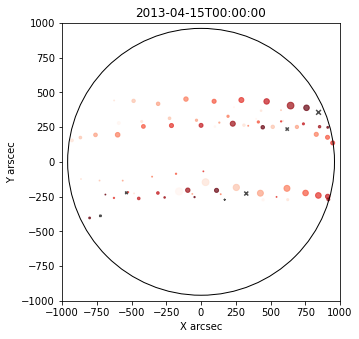

In [11]:
plot_for_date(1200)

In [12]:
all_data.keys()

Index(['ar_noaanum', 'event_starttime', 'event_endtime', 'hpc_x', 'hpc_y',
       'hgs_x', 'hgs_y', 'hgc_x', 'hgc_y', 'frm_humanflag', 'frm_name',
       'frm_daterun', 'ar_mtwilsoncls', 'ar_mcintoshcls', 'SOL_standard',
       'ar_numspots', 'area_atdiskcenter', 'area_unit', 'times'],
      dtype='object')

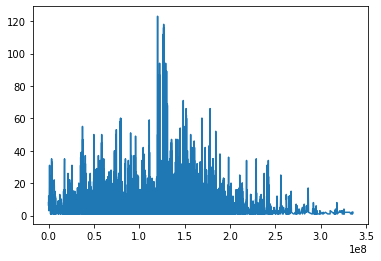

In [16]:
plt.plot(all_data['times'], all_data['ar_numspots'])

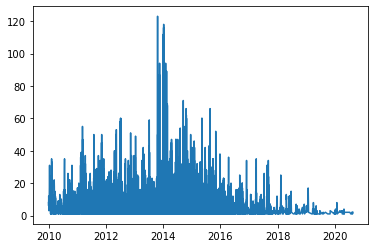

In [19]:
plt.plot(tt, all_data['ar_numspots'])

In [21]:
test_series = pd.Series(all_data['ar_numspots'].values, index=tt)

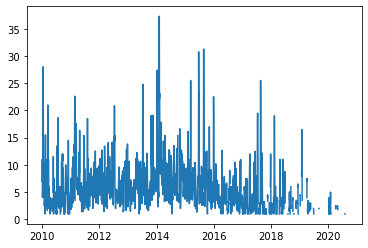

In [23]:
plt.plot(test_series.resample('2D').mean())

In [43]:

i = 100
spots = []
no_ar = []
for i in range(len(time_over)):
    data_for_day = all_data[all_data['event_starttime'].isin([time_over[i]])]
    no_spots = data_for_day['ar_numspots'].sum()
    spots.append(no_spots)
    no_ar.append(len(data_for_day))

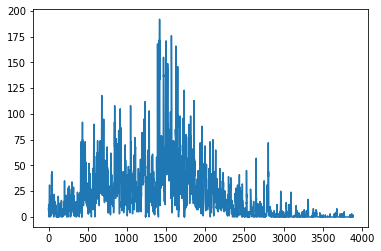

In [44]:
plt.plot(spots)

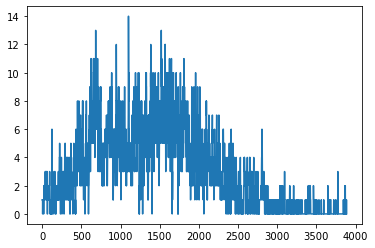

In [45]:
plt.plot(no_ar)

In [101]:
spots_ar = pd.Series(spots, index=parse_time(time_over).datetime)
ar_no = pd.Series(no_ar, index=parse_time(time_over).datetime)
ssn_tots = 10*ar_no+spots_ar

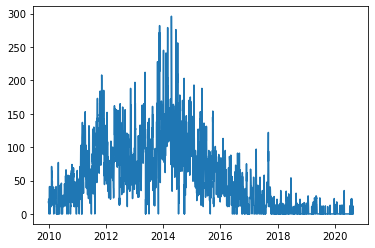

In [102]:
plt.plot(ssn_tots)

In [71]:
flares = pd.read_csv("../since_1986_c1_solarcycle_flares.csv")  

In [85]:
flares

,event_starttime,event_peaktime,event_endtime,fl_goescls,ar_noaanum,goes_class,flare_times
0,1986-09-08T16:43:00,1986-09-08T16:44:00,1986-09-08T16:55:00,C2.6,4745,0.000003,1986-09-08 16:44:00
1,1986-10-13T00:09:00,1986-10-13T00:11:00,1986-10-13T00:14:00,C1.1,4748,0.000001,1986-10-13 00:11:00
2,1986-10-14T13:38:00,1986-10-14T14:50:00,1986-10-14T15:03:00,C2.2,0,0.000002,1986-10-14 14:50:00
3,1986-10-14T21:54:00,1986-10-14T22:23:00,1986-10-14T22:57:00,C3.3,4747,0.000003,1986-10-14 22:23:00
4,1986-10-15T21:12:00,1986-10-15T21:42:00,1986-10-15T21:42:00,C1.1,0,0.000001,1986-10-15 21:42:00
...,...,...,...,...,...,...,...
39032,2019-05-06T13:35:00,2019-05-06T13:54:00,2019-05-06T13:57:00,C7.3,12740,0.000007,2019-05-06 13:54:00
39033,2019-05-07T09:51:00,2019-05-07T10:48:00,2019-05-07T10:58:00,C1.2,12740,0.000001,2019-05-07 10:48:00
39034,2019-05-07T11:52:00,2019-05-07T11:56:00,2019-05-07T11:57:00,C1.4,12740,0.000001,2019-05-07 11:56:00
39035,2019-05-09T05:40:00,2019-05-09T05:51:00,2019-05-09T05:56:00,C6.7,12740,0.000007,2019-05-09 05:51:00


In [72]:
def read_ssn():
    ssn = pd.read_csv("../SN_m_tot_V2.0.csv", names=['year', 'month', 'decimal_date', \
                                                  'ssn', 'ssn_dev', 'number_obs', 'indicator'], 
             delimiter=';')
    years = ssn['year'].values; months = ssn['month']
    tt = [datetime.datetime(ssn['year'][i], ssn['month'][i], 1) for i in range(len(ssn))]


    ssn['times'] = tt

    return ssn.set_index('times')

In [73]:
ssn = read_ssn()

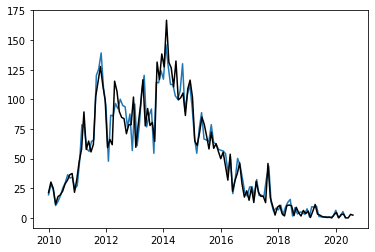

In [105]:
fig, ax = plt.subplots()
ax.plot(ssn['ssn'].truncate('2010-01-01', '2020-08-20'))
#ax.plot(spots_ar.resample("30D").mean(), color='r')
ax.plot(ssn_tots.resample("30D").mean(), color='k')

# ax2 = ax.twinx()
# ax2.plot(ar_no.resample("30D").mean(), color='g')

In [58]:
parse_time(time_over).datetime

array([datetime.datetime(2010, 1, 1, 0, 0),
       datetime.datetime(2010, 1, 2, 0, 0),
       datetime.datetime(2010, 1, 3, 0, 0), ...,
       datetime.datetime(2020, 8, 18, 0, 0),
       datetime.datetime(2020, 8, 19, 0, 0),
       datetime.datetime(2020, 8, 20, 0, 0)], dtype=object)

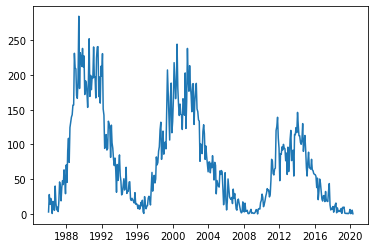

In [87]:
plt.plot(ssn['ssn'].truncate('1986-01-01', '2020-08-20'))

In [88]:
ssn

,year,month,decimal_date,ssn,ssn_dev,number_obs,indicator
times,,,,,,,
1749-01-01,1749,1,1749.042,96.7,-1.0,-1,1
1749-02-01,1749,2,1749.123,104.3,-1.0,-1,1
1749-03-01,1749,3,1749.204,116.7,-1.0,-1,1
1749-04-01,1749,4,1749.288,92.8,-1.0,-1,1
1749-05-01,1749,5,1749.371,141.7,-1.0,-1,1
...,...,...,...,...,...,...,...
2020-01-01,2020,1,2020.042,6.4,0.7,722,0
2020-02-01,2020,2,2020.124,0.4,0.1,853,0
2020-03-01,2020,3,2020.206,1.5,0.2,937,0


In [89]:
aa = "11141023 0043 S15E08 BGD         12192"

In [97]:
aa[33:38]

'12192'